# Access data file

In [1]:
# Imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats


In [5]:
# Access data
raw_df = pd.read_csv("lung_cancer_data.csv")
raw_df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


# Clean data

In [7]:
# Check for missing data
raw_df.count()

Patient_ID                          23658
Age                                 23658
Gender                              23658
Smoking_History                     23658
Tumor_Size_mm                       23658
Tumor_Location                      23658
Stage                               23658
Treatment                           23658
Survival_Months                     23658
Ethnicity                           23658
Insurance_Type                      23658
Family_History                      23658
Comorbidity_Diabetes                23658
Comorbidity_Hypertension            23658
Comorbidity_Heart_Disease           23658
Comorbidity_Chronic_Lung_Disease    23658
Comorbidity_Kidney_Disease          23658
Comorbidity_Autoimmune_Disease      23658
Comorbidity_Other                   23658
Performance_Status                  23658
Blood_Pressure_Systolic             23658
Blood_Pressure_Diastolic            23658
Blood_Pressure_Pulse                23658
Hemoglobin_Level                  

In [8]:
raw_df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Smoking_History', 'Tumor_Size_mm',
       'Tumor_Location', 'Stage', 'Treatment', 'Survival_Months', 'Ethnicity',
       'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes',
       'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease',
       'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease',
       'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other',
       'Performance_Status', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level',
       'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level',
       'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level',
       'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level',
       'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level',
       'Sodium_Level', 'Smoking_Pack_Years'],
      dtype='object')

In [9]:
cancer_df = raw_df[["Patient_ID", "Age", "Gender", "Ethnicity", "Family_History", "Smoking_History", "Smoking_Pack_Years", "Tumor_Size_mm", "Tumor_Location", "Stage", "Treatment", "Survival_Months"]]
cancer_df.head()

,Patient_ID,Age,Gender,Ethnicity,Family_History,Smoking_History,Smoking_Pack_Years,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months
0,Patient0000,68,Male,Hispanic,No,Current Smoker,17.006956,81.678677,Lower Lobe,Stage III,Surgery,44
1,Patient0001,58,Male,Caucasian,Yes,Never Smoked,93.270893,78.448272,Lower Lobe,Stage I,Radiation Therapy,101
2,Patient0002,44,Male,African American,Yes,Former Smoker,70.348376,67.714305,Lower Lobe,Stage I,Chemotherapy,69
3,Patient0003,72,Male,African American,Yes,Current Smoker,19.828128,70.806008,Lower Lobe,Stage III,Chemotherapy,95
4,Patient0004,37,Female,Asian,No,Never Smoked,81.047456,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105


# Question 1
- Are there any demographics within the dataset that demonstrate higher risk of lung cancer?
- Distribution of demographic factors  (age, gender and ethnicity) of lung cancer patients 

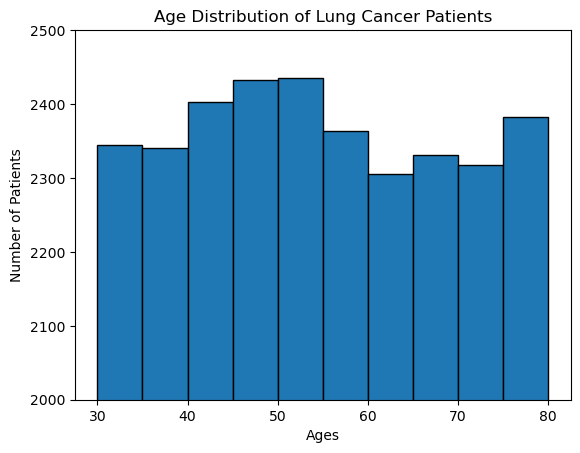

In [64]:
# Age
bins=[30,35,40,45,50,55,60,65,70,75,80]
plt.hist(cancer_df["Age"], bins=bins, edgecolor="black")
plt.title("Age Distribution of Lung Cancer Patients")
plt.ylabel("Number of Patients")
plt.ylim(2000, 2500)
plt.xlabel("Ages")
plt.show()

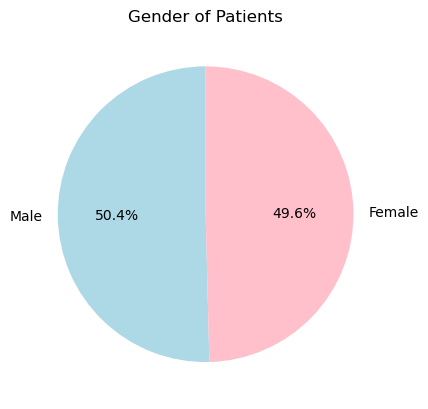

In [28]:
# Gender
genders = ["Male", "Female"]
colors = ["lightblue", "pink"]
gender_counts = cancer_df["Gender"].value_counts()

plt.pie(gender_counts, colors=colors, labels=genders, autopct="%1.1f%%", startangle=90)
plt.title("Gender of Patients")
plt.show()

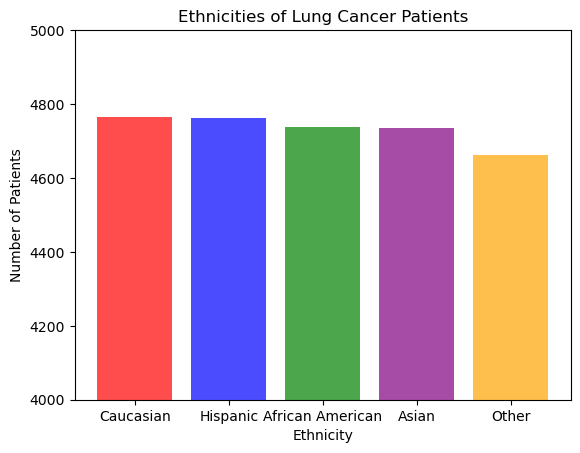

In [49]:
# Ethnicity
ethnicity_counts = cancer_df["Ethnicity"].value_counts()
ethnicity_x = ethnicity_counts.index
ethnicity_y = ethnicity_counts.values
colors = ["red", "blue", "green", "purple", "orange"]

plt.bar(ethnicity_x, ethnicity_y, color=colors, alpha=.70)
plt.title("Ethnicities of Lung Cancer Patients")
plt.ylim(4000, 5000)
plt.ylabel("Number of Patients")
plt.xlabel("Ethnicity")
plt.xticks()
plt.show()


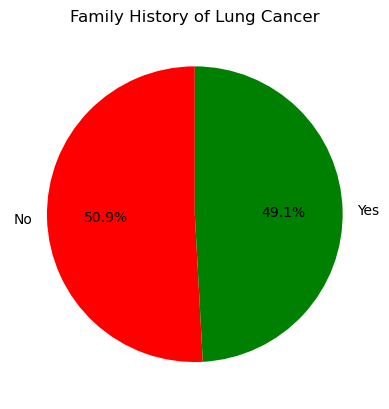

In [31]:
# Famliy History
family_history = cancer_df["Family_History"].value_counts()
histories = ["No", "Yes"]
colors = ["red", "green"]

plt.pie(family_history, colors=colors, labels=histories, autopct="%1.1f%%",startangle=90)
plt.title("Family History of Lung Cancer Patients")
plt.show()

# Question 2
- What impact does smoking have on the onset of lung cancer?
- Age, smoking history and smoking pack years

In [ ]:
# Age vs Smoking History

In [ ]:
# Age vs Smoking Pack-Years

# Question 3

# Question 4

# Question 5

# Question 6

# Question 7

# Question 8